In [1]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding, Dropout, Concatenate
from tensorflow.keras.models import Model

In [2]:
# pip install tqdm -> progressbar 
from tqdm import tqdm

In [3]:
categories = ['comp.sys.mac.hardware', 'rec.motorcycles', 'sci.electronics']

newsgroups_train = fetch_20newsgroups(subset='train', shuffle=True, categories=categories)

print(newsgroups_train.target_names)
print(len(newsgroups_train.data))

['comp.sys.mac.hardware', 'rec.motorcycles', 'sci.electronics']
1767


In [4]:
# print(newsgroups_train.data[0])
print(newsgroups_train.data[0].split("\n")[10:15])

[': |> In article <2514@tekgen.bv.tek.com> davet@interceptor.cds.tek.com (Dave Tharp CDS) writes:', ': |> >In article <1993Apr15.171757.10890@i88.isc.com> jeq@lachman.com (Jonathan E. Quist) writes:', ': |> >>Rolls-Royce owned by a non-British firm?', ': |> >>', ': |> >>Ye Gods, that would be the end of civilization as we know it.']


In [5]:
print(newsgroups_train.keys())

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


In [6]:
print(len(newsgroups_train.data))
print(len(newsgroups_train.filenames))
print(len(newsgroups_train.target_names))
print(len(newsgroups_train.target))

1767
1767
3
1767


In [7]:
print(newsgroups_train.target_names)

['comp.sys.mac.hardware', 'rec.motorcycles', 'sci.electronics']


In [8]:
newsgroups_train.data[0]

'From: npet@bnr.ca (Nick Pettefar)\nSubject: Re: Happy Easter!\nNntp-Posting-Host: bmdhh299\nOrganization: BNR Europe Ltd, Maidenhead, UK\nX-Newsreader: TIN [version 1.1 PL8]\nLines: 37\n\nkevinh, on the Tue, 20 Apr 1993 13:23:01 GMT wibbled:\n\n: In article <1993Apr19.154020.24818@i88.isc.com>, jeq@lachman.com (Jonathan E. Quist) writes:\n: |> In article <2514@tekgen.bv.tek.com> davet@interceptor.cds.tek.com (Dave Tharp CDS) writes:\n: |> >In article <1993Apr15.171757.10890@i88.isc.com> jeq@lachman.com (Jonathan E. Quist) writes:\n: |> >>Rolls-Royce owned by a non-British firm?\n: |> >>\n: |> >>Ye Gods, that would be the end of civilization as we know it.\n: |> >\n: |> >  Why not?  Ford owns Aston-Martin and Jaguar, General Motors owns Lotus\n: |> >and Vauxhall.  Rover is only owned 20% by Honda.\n: |> \n: |> Yes, it\'s a minor blasphemy that U.S. companies would ?? on the likes of A.M.,\n: |> Jaguar, or (sob) Lotus.  It\'s outright sacrilege for RR to have non-British\n: |> ownership

In [9]:
%%time
labels = newsgroups_train.target
texts = newsgroups_train.data

MAX_VOCAB_SIZE = 20000
MAX_SEQUENCE_LENGTH = 1000

tokenizer = Tokenizer(num_words = MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(texts)

sequences = tokenizer.texts_to_sequences(texts)

CPU times: user 434 ms, sys: 11.1 ms, total: 445 ms
Wall time: 455 ms


In [10]:
print(sequences[0][:10])
print(texts[0])

[12, 1265, 270, 70, 769, 1233, 20, 33, 1207, 4237]
From: npet@bnr.ca (Nick Pettefar)
Subject: Re: Happy Easter!
Nntp-Posting-Host: bmdhh299
Organization: BNR Europe Ltd, Maidenhead, UK
X-Newsreader: TIN [version 1.1 PL8]
Lines: 37

kevinh, on the Tue, 20 Apr 1993 13:23:01 GMT wibbled:

: In article <1993Apr19.154020.24818@i88.isc.com>, jeq@lachman.com (Jonathan E. Quist) writes:
: |> In article <2514@tekgen.bv.tek.com> davet@interceptor.cds.tek.com (Dave Tharp CDS) writes:
: |> >In article <1993Apr15.171757.10890@i88.isc.com> jeq@lachman.com (Jonathan E. Quist) writes:
: |> >>Rolls-Royce owned by a non-British firm?
: |> >>
: |> >>Ye Gods, that would be the end of civilization as we know it.
: |> >
: |> >  Why not?  Ford owns Aston-Martin and Jaguar, General Motors owns Lotus
: |> >and Vauxhall.  Rover is only owned 20% by Honda.
: |> 
: |> Yes, it's a minor blasphemy that U.S. companies would ?? on the likes of A.M.,
: |> Jaguar, or (sob) Lotus.  It's outright sacrilege for RR to have

In [11]:
word_index = tokenizer.word_index
print("Unique tokens:", len(word_index))

Unique tokens: 25458


In [12]:
data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

In [13]:
print(data.shape)
print(data[0][680:730])

(1767, 1000)
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0   12 1265  270   70  769 1233   20   33 1207
 4237   52   47   49 3173   25  270 2009  999 1735  146  107  402  471
  238   34   34 1052   21 1390 3928   15]


In [14]:
labels = to_categorical(np.array(labels))
labels

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

In [15]:
print('Data shape:', data.shape)
print('Label shape:', labels.shape)

Data shape: (1767, 1000)
Label shape: (1767, 3)


In [16]:
VALIDATION_SPLIT = 0.2

indices = np.arange(data.shape[0])
np.random.shuffle(indices) 
data = data[indices] 
labels = labels[indices] 
nb_validation_samples = int(VALIDATION_SPLIT * data.shape[0])

x_train = data[:-nb_validation_samples] 
y_train = labels[:-nb_validation_samples] 
x_val = data[-nb_validation_samples:] 
y_val = labels[-nb_validation_samples:] 

print (x_train.shape)
print (y_train.shape)

print('Number of catrgories in traing and validation set ') 
print (y_train.sum(axis=0))
print (y_val.sum(axis=0))


(1414, 1000)
(1414, 3)
Number of catrgories in traing and validation set 
[466. 482. 466.]
[112. 116. 125.]


In [17]:
%%time 
embeddings_index = {}

f = open('./dataset/glove.6B.100d.txt')
for line in tqdm(f):
    values = line.split(' ')
    word = values[0] 
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print("Words vectors:", len(embeddings_index))

400000it [00:07, 55386.52it/s]

Words vectors: 400000
CPU times: user 6.75 s, sys: 414 ms, total: 7.17 s
Wall time: 7.24 s


In [18]:
EMBEDDING_DIM = 100

In [19]:
embedding_matrix = np.random.random( (len(word_index) + 1, EMBEDDING_DIM) )

In [20]:
embedding_matrix

array([[0.09138459, 0.8589186 , 0.54230628, ..., 0.89130665, 0.46599401,
        0.13414941],
       [0.26434474, 0.73574777, 0.41605134, ..., 0.66429079, 0.33587481,
        0.80688877],
       [0.30217203, 0.79246312, 0.10575148, ..., 0.23363636, 0.51039705,
        0.79246507],
       ...,
       [0.64861091, 0.62442504, 0.11017971, ..., 0.24217603, 0.06489035,
        0.17235702],
       [0.65556883, 0.62422751, 0.00545619, ..., 0.52761987, 0.65978224,
        0.26078344],
       [0.02492586, 0.45034826, 0.8456187 , ..., 0.97081595, 0.86340654,
        0.34468581]])

In [21]:
for word, i in word_index.items():
    # embedding 된 단어를 glove.6B.100d에 존재하는지 검색
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector # glove.6B.100d의 벡터값을 embedding 단어에 지정

print(embedding_matrix.shape)

(25459, 100)


In [22]:
print(embedding_matrix[0][:10])

[0.09138459 0.8589186  0.54230628 0.32123068 0.77430148 0.34165801
 0.38780072 0.03342535 0.89969925 0.954677  ]


In [23]:
# Generate a model
convs = []
filter_sizes = [3,4,5]

embedding_layer = Embedding(len(word_index) + 1, EMBEDDING_DIM,
                           weights=[embedding_matrix],
                           input_length=MAX_SEQUENCE_LENGTH,
                           trainable=False)

sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)

# RNN, LSTM, GRU 
# DNN 
for filter_size in filter_sizes:
    conv = Conv1D(filters=128, kernel_size=filter_size, activation='relu')(embedded_sequences)
    pool = MaxPooling1D(5)(conv)
    convs.append(pool)

merged_convs = Concatenate(axis=1)(convs)

conv1 = Conv1D(128, 5, activation='relu')(merged_convs)
pool1 = MaxPooling1D(5)(conv1)
conv2 = Conv1D(128, 5, activation='relu')(pool1)
pool2 = MaxPooling1D(5)(conv2)
flat = Flatten()(pool2)
dense = Dense(128, activation='relu')(flat)
preds = Dense(3, activation='softmax')(dense)

model = Model(sequence_input, preds)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

model.summary()
    

2022-03-23 14:42:58.987706: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1000)]       0           []                               
                                                                                                  
 embedding (Embedding)          (None, 1000, 100)    2545900     ['input_1[0][0]']                
                                                                                                  
 conv1d (Conv1D)                (None, 998, 128)     38528       ['embedding[0][0]']              
                                                                                                  
 conv1d_1 (Conv1D)              (None, 997, 128)     51328       ['embedding[0][0]']              
                                                                                              

In [24]:
r = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, batch_size=128)

Epoch 1/10
12/12 [==============================] - 8s 590ms/step - loss: 1.3111 - acc: 0.3479 - val_loss: 1.1253 - val_acc: 0.3173
Epoch 2/10
12/12 [==============================] - 8s 643ms/step - loss: 1.0993 - acc: 0.3487 - val_loss: 1.1257 - val_acc: 0.3654
Epoch 3/10
12/12 [==============================] - 8s 663ms/step - loss: 1.0958 - acc: 0.3784 - val_loss: 1.1037 - val_acc: 0.3541
Epoch 4/10
12/12 [==============================] - 8s 679ms/step - loss: 1.0595 - acc: 0.4151 - val_loss: 1.0884 - val_acc: 0.3569
Epoch 5/10
12/12 [==============================] - 7s 613ms/step - loss: 0.9674 - acc: 0.5134 - val_loss: 0.8334 - val_acc: 0.6006
Epoch 6/10
12/12 [==============================] - 7s 622ms/step - loss: 0.6944 - acc: 0.6768 - val_loss: 0.8018 - val_acc: 0.6516
Epoch 7/10
12/12 [==============================] - 7s 622ms/step - loss: 0.5651 - acc: 0.7567 - val_loss: 0.5477 - val_acc: 0.7365
Epoch 8/10
12/12 [==============================] - 7s 596ms/step - loss: 0.

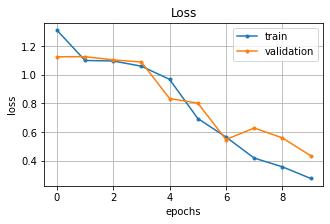

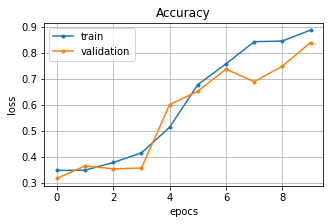

In [25]:
plt.figure(figsize=(5,3))
plt.plot(r.history['loss'], marker='.', label='train')
plt.plot(r.history['val_loss'], marker='.', label='validation')
plt.title('Loss')
plt.grid(True)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(loc='best')
plt.show()

plt.figure(figsize=(5,3))
plt.plot(r.history['acc'], marker='.', label='train')
plt.plot(r.history['val_acc'], marker='.', label='validation')
plt.title('Accuracy')
plt.grid(True)
plt.xlabel('epocs')
plt.ylabel('loss')
plt.legend(loc='best')
plt.show()

In [38]:
# article= '''Rugged mountains, vast valleys, wild rivers, dense forests and a fantastic coastline: BMW Motorrad will be bringing the International GS Trophy to Albania between 4 and 10 September 2022. The country, which is considered an insider tip for off-road touring, is incredibly rich in flora, fauna and culture. The best Enduro riders in the world can look forward to discovering this as yet quite unknown beauty on their GS bikes, in numerous special stages of the action-packed competition, and experience the #SpiritOfGS up close.'''
article= '''The new Mac Studio has officially arrived. Whether you look at it as a ‘mini Mac Pro’ or a ‘Pro Mac mini,’ it’s an impressive machine that packs a major punch. Head below for our very early and quick look at the new Mac Studio in the real world.
The Mac Studio features what has turned out to be somewhat of a polarizing design. It’s essentially the size of three Mac minis stacked on top of each other. Think of it as a Mac mini, but stretched. It’s a bit odd-looking in real-life, but not necessarily in a bad way. Just different.
On the back of the Mac Studio, you’ll find a really unique perforated cooling design. I didn’t count them, but Apple says there are over 4,000 perforations on the back and bottom of the Mac Studio “to help cool the high-performance chips” inside the machine.
But where the Mac Studio really shines is with its I/O options. On the front, there are two USB-C ports and an SD card slot. If you opted for the M1 Ultra (which I did not), those USB-C ports on the front are also Thunderbolt 4 capable.
'''

In [39]:
test_sequences = tokenizer.texts_to_sequences([article])

In [40]:
test_sequences_padding = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH)

In [41]:
score = model.predict(test_sequences_padding)

In [42]:
print(score)

[[9.8758209e-01 7.8571873e-05 1.2339355e-02]]


In [43]:
np.argmax(score)

0

In [44]:
print("Predict cateogry: ", categories[np.argmax(score)])

Predict cateogry:  comp.sys.mac.hardware
